In [1]:
import pandas as pd
import numpy as np 

In [5]:
movie = pd.read_csv("E:\movie_metadata.csv")
pca = pd.read_csv("E:\pcademo.csv")


In [3]:
movie.head()

,movie_code,duration,facenumber_in_poster,country,budget,gross,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,imdb_score,imdb_score_class
0,1,178.0,0.0,USA,237000000.0,760505847.0,886204,3054.0,723.0,33000,0.0,1000.0,936.0,855.0,4834,7.9,Good
1,2,169.0,0.0,USA,300000000.0,309404152.0,471220,1238.0,302.0,0,563.0,40000.0,5000.0,1000.0,48350,7.1,Good
2,3,148.0,1.0,UK,245000000.0,200074175.0,275868,994.0,602.0,85000,0.0,11000.0,393.0,161.0,11700,6.8,Good
3,4,164.0,0.0,USA,250000000.0,448130642.0,1144337,2701.0,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759,8.5,Excellent
4,5,132.0,1.0,USA,263700000.0,73058679.0,212204,738.0,462.0,24000,475.0,640.0,632.0,530.0,1873,6.6,Good


## random sampling

In [7]:
sample1 = movie.sample(n=100)
sample1.to_csv("sample1.csv",sep=";")

In [12]:
sample2 = movie.sample(frac=0.1)
sample2.to_csv("sampel2.csv",sep=";")

## Principal Component Analysis

In [14]:
#principal component analysis
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [15]:
#set up the feature
feature = pca.iloc[0:51,1:20]
feature.tail()

,Census Resident Total Population - Apr-1-2000,Resident Total Population Estimate - Jul-1-2000,Resident Total Population Estimate - Jul-1-2001,Net Domestic Migration - Jul-1-2000,Net Domestic Migration - Jul-1-2001,Federal/Civilian Movement from Abroad - Jul-1-2000,Federal/Civilian Movement from Abroad - Jul-1-2001,Net International Migration - Jul-1-2000,Net International Migration - Jul-1-2001,Period Births - Jul-1-2000,Period Births - Jul-1-2001,Period Deaths - Jul-1-2000,Period Deaths - Jul-1-2001,Resident Under 65 Population Estimate - Jul-1-2000,Resident Under 65 Population Estimate - Jul-1-2001,Resident 65 Plus Population Estimate - Jul-1-2000,Resident 65 Plus Population Estimate - Jul-1-2001,Residual - Jul-1-2000,Residual - Jul-1-2001
46,7078515.0,7104016.0,7187734.0,8119.0,18299.0,232.0,-1212.0,5721.0,22619.0,24352.0,100188.0,13158.0,57337.0,6308235.0,6380181.0,795781.0,807553.0,235.0,1161.0
47,5894121.0,5908372.0,5987973.0,425.0,21995.0,83.0,-444.0,5249.0,22052.0,19388.0,80339.0,10365.0,44681.0,5244172.0,5317341.0,664200.0,670632.0,-529.0,340.0
48,1808344.0,1807099.0,1801916.0,-1411.0,-4442.0,0.0,-1.0,129.0,491.0,5041.0,20436.0,4937.0,21435.0,1530334.0,1526360.0,276765.0,275556.0,-67.0,-232.0
49,5363675.0,5372243.0,5401906.0,1536.0,2974.0,0.0,-5.0,1571.0,6056.0,16696.0,68631.0,11058.0,47276.0,4669153.0,4698404.0,703090.0,703502.0,-177.0,-717.0
50,493782.0,494001.0,494423.0,-399.0,-2041.0,5.0,-27.0,100.0,390.0,1480.0,6130.0,976.0,3980.0,436178.0,436217.0,57823.0,58206.0,9.0,-50.0


[72.51 87.88 93.48 97.1  98.81 99.58 99.92 99.97 99.98 99.99 99.99 99.99
 99.99 99.99 99.99 99.99 99.99 99.99 99.99]


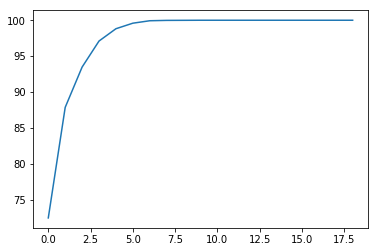

In [19]:
#convert it to numpy arrays 
x= feature.values

#scaling the value
x=scale(x)
pcademo=PCA(n_components=19)
pcademo.fit(x)

#the amount of variance that each PC explain
var = pcademo.explained_variance_ratio_

#cumulative variance
var1=np.cumsum(np.round(pcademo.explained_variance_ratio_,decimals=4)*100)

print(var1)
plt.plot(var1)

In [21]:
# looking 
pca = PCA(n_components=4)
pca.fit(x)
x1= pca.fit_transform(x)
print(x1)

[[-8.27625000e-01 -6.77851852e-01  3.41244151e-01  5.73898186e-03]
 [-2.66009443e+00  2.82610126e-01 -8.19161285e-01  3.52453364e-01]
 [-1.44278534e-01  2.31241212e+00  5.92200347e-01 -7.26205814e-01]
 [-1.72306415e+00 -4.53393952e-02 -2.62636733e-02 -2.67234124e-01]
 [ 1.78509295e+01 -8.80783135e-01 -8.13678384e-01  2.25337354e+00]
 [-6.57499380e-01  1.87527594e+00 -3.83154599e-01 -2.86022560e-01]
 [-1.43934250e+00 -1.02976764e+00  5.65599742e-01  4.33118756e-01]
 [-2.74404736e+00  4.43691924e-02 -2.15934594e-01  9.87599109e-02]
 [-2.74582925e+00 -3.41777732e-02 -6.68636383e-01  5.67108732e-02]
 [ 7.13543401e+00  5.24626371e+00  3.35851217e+00 -1.80632073e+00]
 [ 1.95045073e+00  4.13081746e+00 -1.14448513e+00 -9.02809745e-01]
 [-2.06650140e+00  2.69786339e-01 -8.89631552e-01  1.08918246e+00]
 [-2.42777867e+00  5.02559966e-01 -5.04611814e-01 -2.75390387e-01]
 [ 4.16507630e+00 -1.46599588e+00 -1.52705952e+00 -1.24107591e+00]
 [-1.67007307e-01 -8.43808377e-01  6.38605741e-01 -4.58878692e

In [22]:
feature1 = pd.DataFrame(x1)
feature1.head()

,0,1,2,3
0,-0.827625,-0.677852,0.341244,0.005739
1,-2.660094,0.282610,-0.819161,0.352453
2,-0.144279,2.312412,0.592200,-0.726206
3,-1.723064,-0.045339,-0.026264,-0.267234
4,17.850930,-0.880783,-0.813678,2.253374


In [23]:
movie.head()

,movie_code,duration,facenumber_in_poster,country,budget,gross,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,imdb_score,imdb_score_class
0,1,178.0,0.0,USA,237000000.0,760505847.0,886204,3054.0,723.0,33000,0.0,1000.0,936.0,855.0,4834,7.9,Good
1,2,169.0,0.0,USA,300000000.0,309404152.0,471220,1238.0,302.0,0,563.0,40000.0,5000.0,1000.0,48350,7.1,Good
2,3,148.0,1.0,UK,245000000.0,200074175.0,275868,994.0,602.0,85000,0.0,11000.0,393.0,161.0,11700,6.8,Good
3,4,164.0,0.0,USA,250000000.0,448130642.0,1144337,2701.0,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759,8.5,Excellent
4,5,132.0,1.0,USA,263700000.0,73058679.0,212204,738.0,462.0,24000,475.0,640.0,632.0,530.0,1873,6.6,Good


In [24]:
movie["Profit"]=movie.gross-movie.budget

In [25]:
movie.head()

,movie_code,duration,facenumber_in_poster,country,budget,gross,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,imdb_score,imdb_score_class,Profit
0,1,178.0,0.0,USA,237000000.0,760505847.0,886204,3054.0,723.0,33000,0.0,1000.0,936.0,855.0,4834,7.9,Good,523505847.0
1,2,169.0,0.0,USA,300000000.0,309404152.0,471220,1238.0,302.0,0,563.0,40000.0,5000.0,1000.0,48350,7.1,Good,9404152.0
2,3,148.0,1.0,UK,245000000.0,200074175.0,275868,994.0,602.0,85000,0.0,11000.0,393.0,161.0,11700,6.8,Good,-44925825.0
3,4,164.0,0.0,USA,250000000.0,448130642.0,1144337,2701.0,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759,8.5,Excellent,198130642.0
4,5,132.0,1.0,USA,263700000.0,73058679.0,212204,738.0,462.0,24000,475.0,640.0,632.0,530.0,1873,6.6,Good,-190641321.0
